In [1]:
from geoana import gravity as grav
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [6]:
dx = 25
dy = 25

z = 20

xyz = np.mgrid[-100:100:dx, -100:100:dy, z:z:1j].transpose((1,2,3,0)).squeeze()

p_min = np.r_[-10, -10, -10]
p_max = np.r_[10, 10, 0]

box = grav.Prism(p_min, p_max)

offset = np.r_[25, 0, 0]

box2 = grav.Prism(p_min+offset, p_max+offset)

gv = box.gravitational_field(xyz) * 1E8
# gv += box2.gravitational_field(xyz) * 1E8 

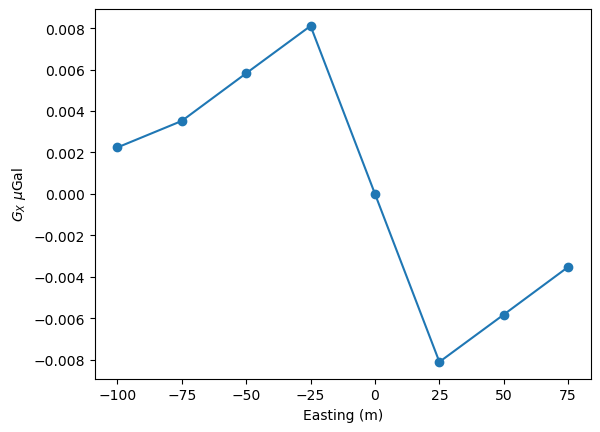

In [7]:
ind = 3  # slice index
plt.plot(xyz[:, ind, 0], gv[:, ind, 0])
plt.scatter(xyz[:, ind, 0], gv[:, ind, 0])
plt.ylabel(r'$G_X$ $\mu$Gal')
plt.xlabel('Easting (m)');

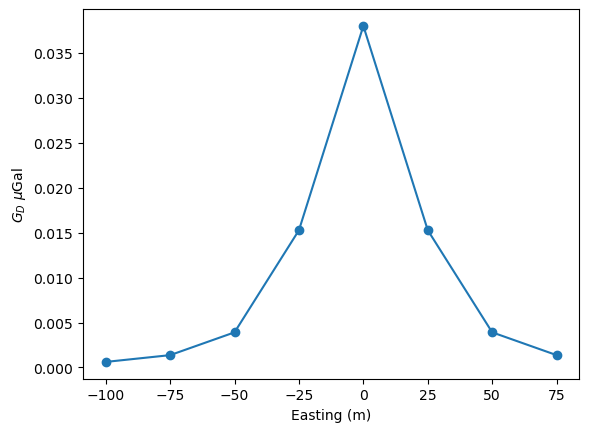

In [8]:
ind = xyz.shape[1]//2

plt.plot(xyz[:, ind, 0], -gv[:, ind, 2])
plt.scatter(xyz[:, ind, 0], -gv[:, ind, 2])

plt.ylabel(r'$G_D$ $\mu$Gal')
plt.xlabel('Easting (m)');

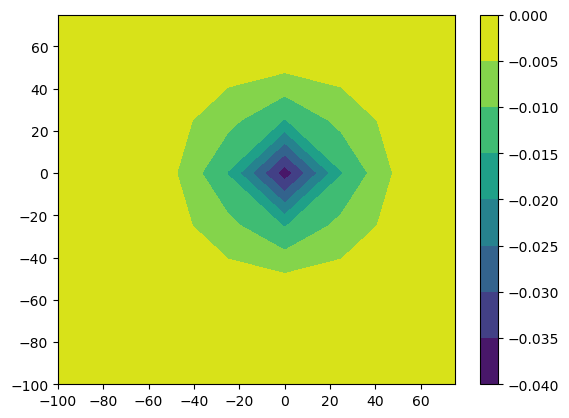

In [9]:
plt.contourf(xyz[..., 0], xyz[..., 1], gv[..., 2])
plt.colorbar()